# Exploratory Data Analysis (EDA)

Take-Home Test: Fraudulent Transaction Detection

by Sawit Koseeyaumporn

In [2]:
import kagglehub
import os
import shutil

# Download latest version
path = kagglehub.dataset_download("sriharshaeedala/financial-fraud-detection-dataset")

print("Path to dataset files:", path)

# Move contents from the cache directory to /content
destination_dir = "/content/"

for item in os.listdir(path):
    source_item = os.path.join(path, item)
    destination_item = os.path.join(destination_dir, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
    else:
        shutil.copy2(source_item, destination_item)

print(f"Moved contents from {path} to {destination_dir}")


Using Colab cache for faster access to the 'financial-fraud-detection-dataset' dataset.
Path to dataset files: /kaggle/input/financial-fraud-detection-dataset
Moved contents from /kaggle/input/financial-fraud-detection-dataset to /content/


In [3]:
import pandas as pd

df = pd.read_csv("/content/Synthetic_Financial_datasets_log.csv")

### 1. Missing values and data understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
display(df.head())
display(df.isnull().sum())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


* We can see that the data has no missing values.

### 2. Check imbalance datasets (on target `is_fraud`)

In [7]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [9]:
df['isFraud'].value_counts(normalize=True) * 100

,proportion
isFraud,
0,99.870918
1,0.129082


* Very imbalanced datasets

not fraud - 99.87%
is fraud - 0.129%

That's mean if we want to did the classification model it should be handles with undersampling or SMOTE techniques.

### 3. Explore the transaction types and their relationship with fraud.

In [11]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [12]:
# Value counts of is_fraud

df[df['isFraud'] == 1]['type'].value_counts()

,count
type,
CASH_OUT,4116
TRANSFER,4097


In [13]:
# Value counts of is not fraud

df[df['isFraud'] == 0]['type'].value_counts()

,count
type,
CASH_OUT,2233384
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,528812
DEBIT,41432


### **Key Insight** : The fraud transactions have transaction type only `CASH_OUT` and `TRANSFER`

### 4. Explore the transaction amounts and their relationship with fraud.

In [14]:
# Fraud amount
df[df['isFraud'] == 1]['amount'].describe()

,amount
count,8.213000e+03
mean,1.467967e+06
std,2.404253e+06
min,0.000000e+00
25%,1.270913e+05
50%,4.414234e+05
75%,1.517771e+06
max,1.000000e+07


In [15]:
# Non fraud amount
df[df['isFraud'] == 0]['amount'].describe()

,amount
count,6.354407e+06
mean,1.781970e+05
std,5.962370e+05
min,1.000000e-02
25%,1.336840e+04
50%,7.468472e+04
75%,2.083648e+05
max,9.244552e+07


* Visualize the amount for fraud and non-fraud transactions, using log scale for skewed data

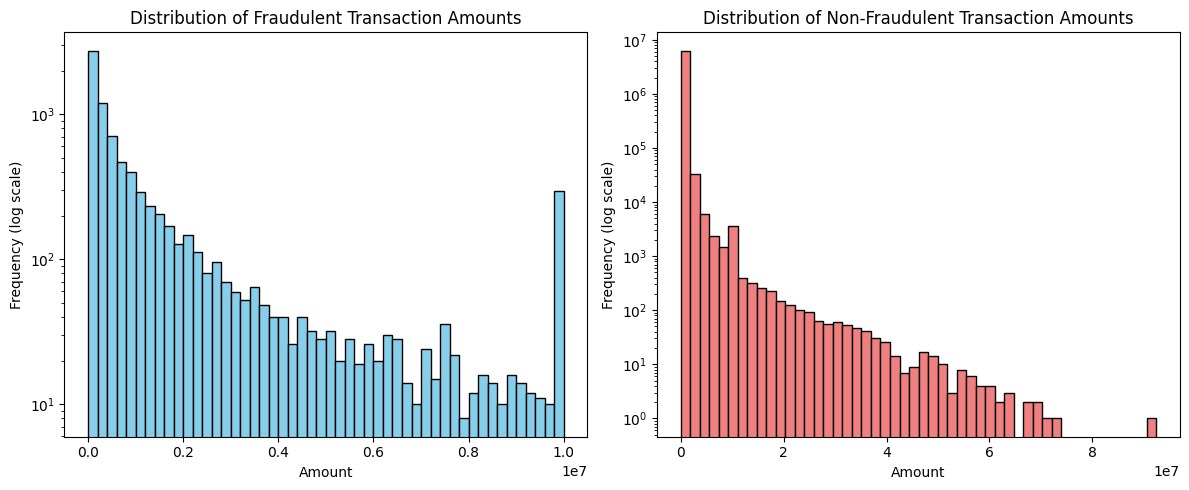

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fraudulent_amounts = df[df['is_fraud'] == 1]['amount']
non_fraudulent_amounts = df[df['is_fraud'] == 0]['amount']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(fraudulent_amounts, bins=50, color='skyblue', edgecolor='black', log=True)
axes[0].set_title('Distribution of Fraudulent Transaction Amounts')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency (log scale)')

axes[1].hist(non_fraudulent_amounts, bins=50, color='lightcoral', edgecolor='black', log=True)
axes[1].set_title('Distribution of Non-Fraudulent Transaction Amounts')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()

### 5. Explore distribution of account balances (`src_bal`, `src_new_bal`, `dst_bal`, `dst_new_bal`) and their relationship with fraud.


In [ ]:
df_fraudulent = df[df['is_fraud'] == 1]
df_non_fraudulent = df[df['is_fraud'] == 0]

balance_cols = ['src_bal', 'src_new_bal', 'dst_bal', 'dst_new_bal']

print("Descriptive statistics for balance columns (Fraudulent Transactions):")
display(df_fraudulent[balance_cols].describe())

print("\nDescriptive statistics for balance columns (Non-Fraudulent Transactions):")
display(df_non_fraudulent[balance_cols].describe())

Descriptive statistics for balance columns (Fraudulent Transactions):


,src_bal,src_new_bal,dst_bal,dst_new_bal
count,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03
mean,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06
std,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03
75%,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06
max,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08



Descriptive statistics for balance columns (Non-Fraudulent Transactions):


,src_bal,src_new_bal,dst_bal,dst_new_bal
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06
mean,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06
std,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05
75%,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06
max,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08


Visualize Histogram of distribution of the balance columns for both fraudulent and non-fraudulent transactions



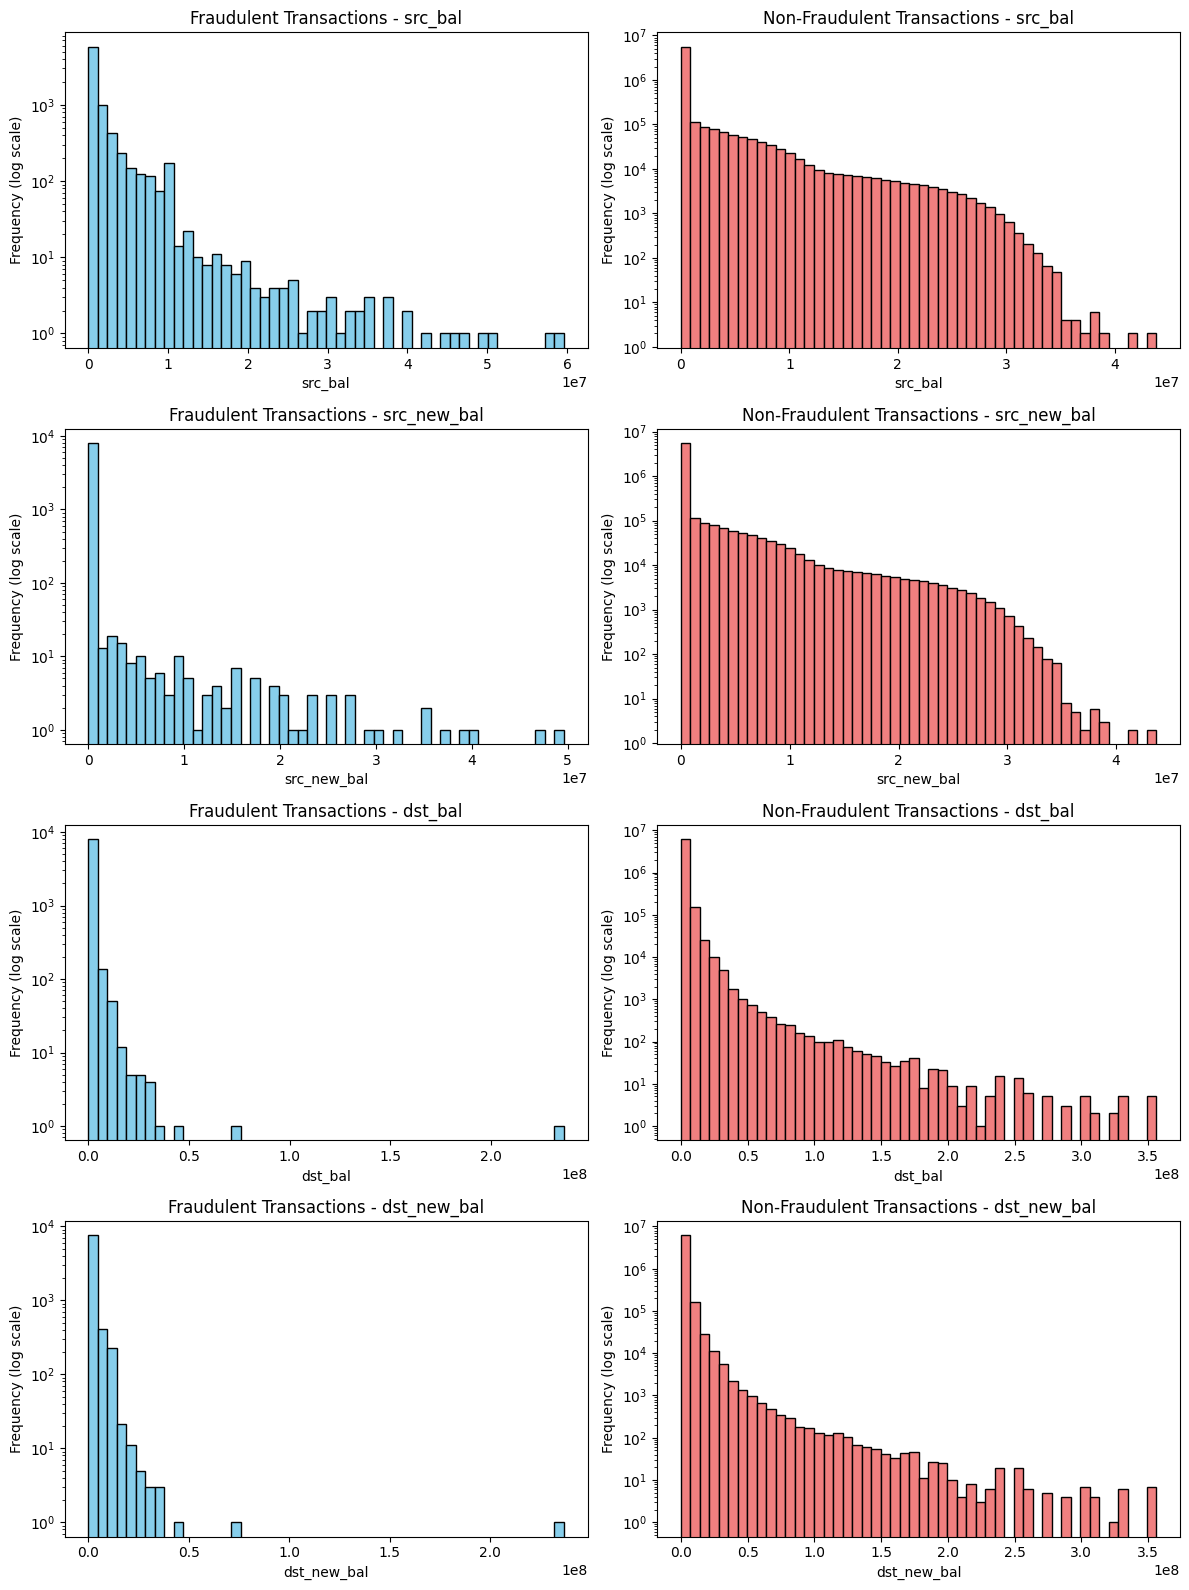

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

balance_cols = ['src_bal', 'src_new_bal', 'dst_bal', 'dst_new_bal']

fig, axes = plt.subplots(len(balance_cols), 2, figsize=(12, 16))
axes = axes.flatten()

for i, col in enumerate(balance_cols):
    axes[2*i].hist(df_fraudulent[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=50, color='skyblue', edgecolor='black', log=True)
    axes[2*i].set_title(f'Fraudulent Transactions - {col}')
    axes[2*i].set_xlabel(col)
    axes[2*i].set_ylabel('Frequency (log scale)')

    axes[2*i+1].hist(df_non_fraudulent[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=50, color='lightcoral', edgecolor='black', log=True)
    axes[2*i+1].set_title(f'Non-Fraudulent Transactions - {col}')
    axes[2*i+1].set_xlabel(col)
    axes[2*i+1].set_ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()

### **Key Insight** : จากการสำรวจเราจะสังเกตว่า Distribution ของกราฟที่เป็น Fraud จะมีการกระจายตัวที่กระจุกตัวอยู่ทางด้านซ้ายและไม่กระจายตัวเหมือนกับ Non-fraud ทั้งใน src_new_bal, dst_bal, dst_new_bal

### 6. Explore time trends - for my curious if we can use the time series to did the AI model

If applicable, analyze how fraud varies over time using the `time_ind` column.


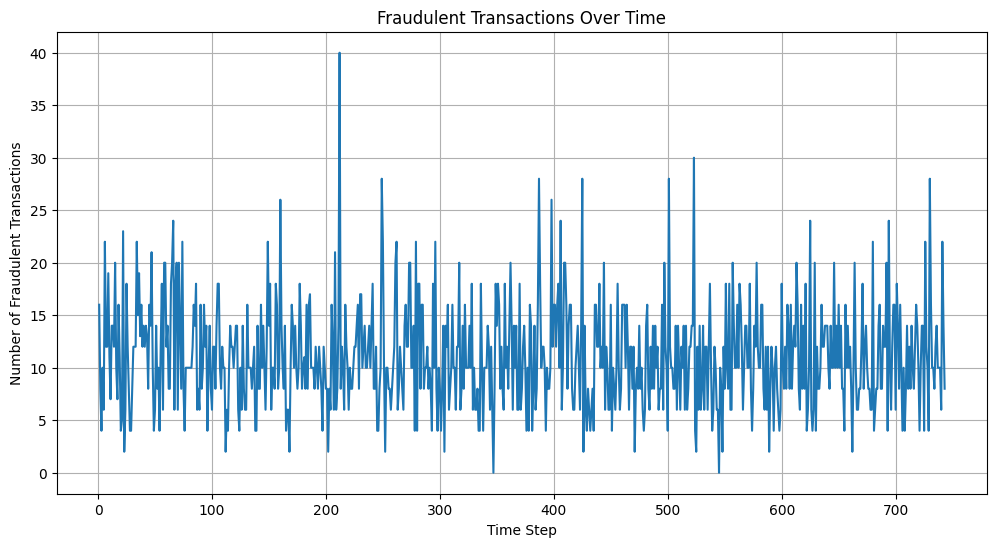

In [ ]:
import matplotlib.pyplot as plt

fraud_over_time = df.groupby('time_ind')['is_fraud'].sum()

plt.figure(figsize=(12, 6))
plt.plot(fraud_over_time.index, fraud_over_time.values)
plt.xlabel('Time Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions Over Time')
plt.grid(True)
plt.show()

Time Trends in Fraud:
- Analysis of fraudulent transactions over time ('time_ind') revealed variations in the number of fraudulent activities across different time steps.
- The plot of fraud over time shows fluctuations, but no clear increasing or decreasing trend was immediately apparent.
- Further time-series analysis could potentially reveal more granular temporal patterns.

### 7. Flagged Fraud - Transactions flagged for illegal attempts (e.g. transferring more than 200,000 in one transaction)

In [ ]:
df[df["is_flagged_fraud"] == 1]

,time_ind,transac_type,amount,src_acc,src_bal,src_new_bal,dst_acc,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
2736446,212,TRANSFER,4953893.08,acc2680695,4953893.08,4953893.08,acc8084602,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,acc8152455,1343002.08,1343002.08,acc6721727,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,acc5456401,536624.41,536624.41,acc2588125,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,acc2836279,4892193.09,4892193.09,acc324927,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,acc6473400,19585040.37,19585040.37,acc1171375,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,acc4711553,19585040.37,19585040.37,acc6868459,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,acc1023994,3576297.10,3576297.10,acc1064142,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,acc1149097,353874.22,353874.22,acc1427736,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,acc3456763,2542664.27,2542664.27,acc4965290,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,acc191137,10399045.08,10399045.08,acc1496862,0.0,0.0,1,1


* the is_fraud will always be with is_flagged_fraud

### 8. Explore relationships between features


Calculate the correlation matrix for numerical columns and visualize it using a heatmap to understand relationships between numerical features and the target variable.



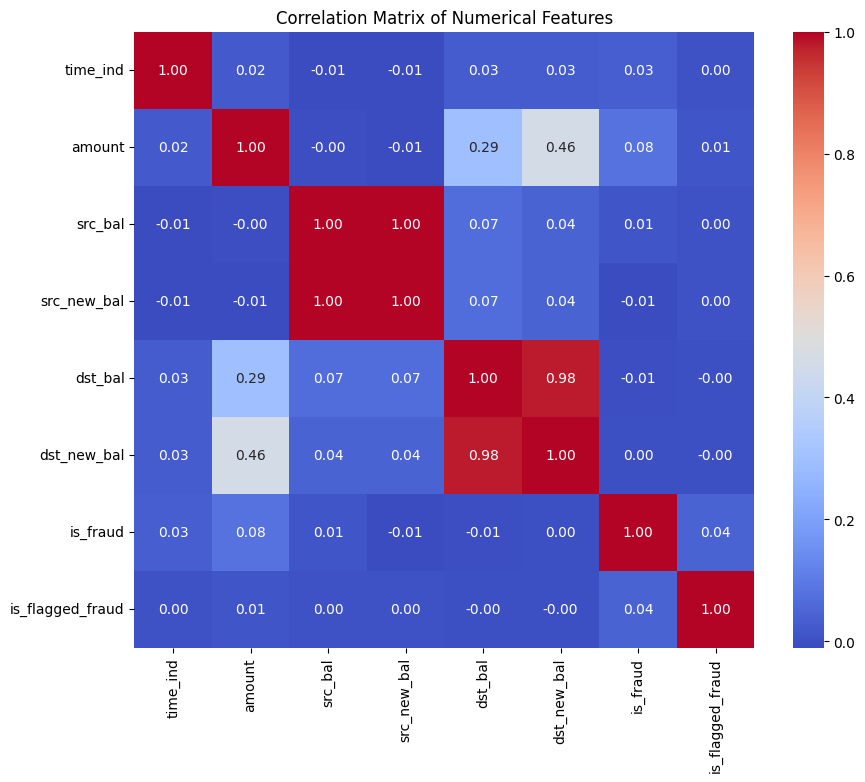

In [ ]:
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* The correlation matrix showed weak linear correlations between most numerical features and 'is_fraud'.

* 'amount' and 'is_flagged_fraud' had the highest (though still low) positive correlations with 'is_fraud'.

* This suggests that while linear relationships are weak, non-linear relationships or interactions between features might be important.

Then, group the DataFrame by transaction type and calculate the mean of 'is_fraud' to assess the relationship between transaction type and fraud. Finally, examine the amount distribution specifically for fraudulent 'TRANSFER' and 'CASH_OUT' transactions.

In [ ]:
fraud_by_transaction_type = df.groupby('transac_type')['is_fraud'].mean().sort_values(ascending=False)
display(fraud_by_transaction_type)

,is_fraud
transac_type,
TRANSFER,0.007688
CASH_OUT,0.001840
CASH_IN,0.000000
DEBIT,0.000000
PAYMENT,0.000000


In [ ]:
fraudulent_transfer_amounts = df[(df['is_fraud'] == 1) & (df['transac_type'] == 'TRANSFER')]['amount']
fraudulent_cash_out_amounts = df[(df['is_fraud'] == 1) & (df['transac_type'] == 'CASH_OUT')]['amount']

print("\nDescriptive statistics for fraudulent TRANSFER amounts:")
display(fraudulent_transfer_amounts.describe())

print("\nDescriptive statistics for fraudulent CASH_OUT amounts:")
display(fraudulent_cash_out_amounts.describe())


Descriptive statistics for fraudulent TRANSFER amounts:


,amount
count,4.097000e+03
mean,1.480892e+06
std,2.414890e+06
min,6.380000e+01
25%,1.284180e+05
50%,4.457058e+05
75%,1.534985e+06
max,1.000000e+07



Descriptive statistics for fraudulent CASH_OUT amounts:


,amount
count,4.116000e+03
mean,1.455103e+06
std,2.393842e+06
min,0.000000e+00
25%,1.254645e+05
50%,4.355169e+05
75%,1.500761e+06
max,1.000000e+07


---

### 9. (Optional) Try Clustering approaches

My idea of this approaches is to check the algorithms from the clustering to see if we can classify it with the clustering with the UMAP (n=2)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


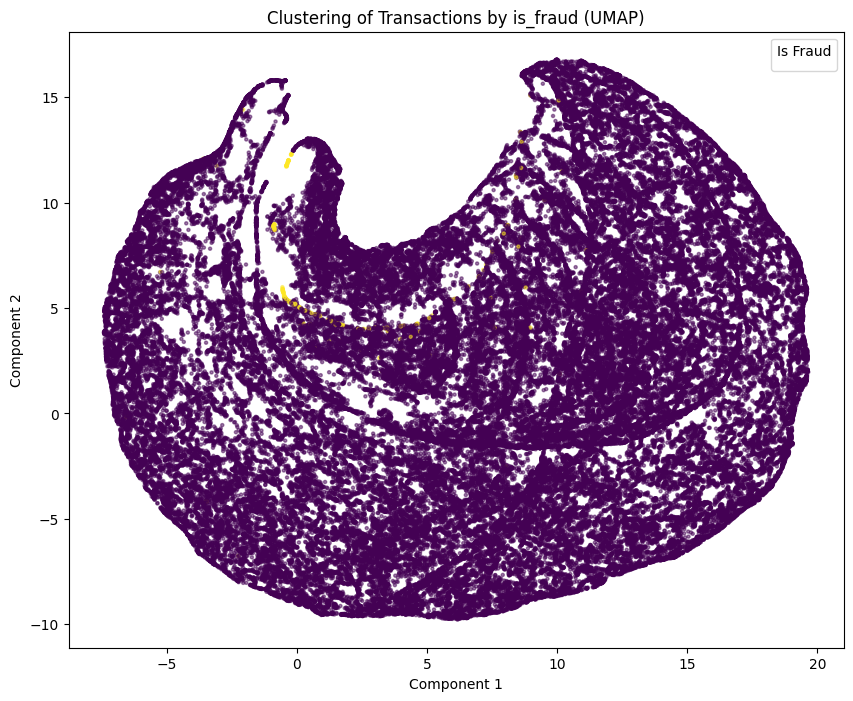

In [ ]:
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("fraud_mock.csv")

df_filtered = df[df['transac_type'].isin(['TRANSFER', 'CASH_OUT'])].copy()

# Take a sample of the filtered data
sample_size = 100000
if len(df_filtered) > sample_size:
    df_sampled = df_filtered.sample(sample_size, random_state=42)
else:
    df_sampled = df_filtered

X_numerical = df_sampled[['amount', 'src_bal', 'src_new_bal', 'dst_bal', 'dst_new_bal']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
y_filtered = df_sampled['is_fraud']

umap_reducer = UMAP(n_components=2, random_state=42)
X_reduced = umap_reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_filtered, cmap='viridis', s=5, alpha=0.5)
plt.title('Clustering of Transactions by is_fraud (UMAP)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
legend_labels = {0: 'Non-Fraud', 1: 'Fraud'}
handles, labels = scatter.legend_elements(prop="colors")
valid_handles = [h for h, label in zip(handles, labels) if label.split('_')[-1].isdigit()]
valid_labels = [label for label in labels if label.split('_')[-1].isdigit()]
legend = plt.legend(valid_handles, [legend_labels[int(label.split('_')[-1])] for label in valid_labels], title="Is Fraud")
plt.show()

From the UMAP clustering we can see that the data is quite hard to use this approaches to classify. So there's no insights from this clustering

---

## Summary


--- Key Insights from Exploratory Data Analysis ---

1. Dataset Characteristics and Class Imbalance:
- The dataset contains 6362620 transactions with 11 features.
- There are no missing values in the dataset.
- The target variable 'is_fraud' shows a significant class imbalance:
  - Non-fraudulent transactions (0): 6354407 (99.87%)
  - Fraudulent transactions (1): 8213 (0.13%)
- This severe imbalance (only 0.13% fraudulent transactions) is a critical factor for model development and evaluation.

2. Transaction Type and Fraud:
- Fraudulent transactions are concentrated exclusively in 'TRANSFER' and 'CASH_OUT' transaction types.
- 'TRANSFER' has the highest fraud rate (0.0077), followed by 'CASH_OUT' (0.0018).
- 'PAYMENT', 'CASH_IN', and 'DEBIT' transaction types show no instances of fraud in this dataset.
- This suggests that transaction type is a highly informative feature for identifying potential fraud.
- **That's mean** we can use the rules to classify the non-fraud at first.

3. Transaction Amount and Fraud:
- Fraudulent transactions generally involve higher amounts compared to non-fraudulent ones.
- Descriptive statistics show higher mean and median amounts for fraudulent transactions.
- While fraudulent amounts can be large (up to 10000000.00), the absolute largest transactions in the dataset are non-fraudulent.
- The distribution of fraudulent amounts is skewed towards higher values within the 'TRANSFER' and 'CASH_OUT' categories.

4. Account Balances and Fraud:
- Differences were observed in account balances between fraudulent and non-fraudulent transactions.
- Fraudulent transactions tend to have higher initial and new balances for both source and destination accounts on average, although with high variability.
- Visualizations highlighted distinct distribution patterns for balances, with non-fraudulent transactions having a larger concentration at zero or low balances.
- Account balances, particularly the changes in balances, appear to be relevant features for fraud detection.

5. Relationships with Other Features:
- The correlation matrix showed weak linear correlations between most numerical features and 'is_fraud'.
- 'amount' and 'is_flagged_fraud' had the highest (though still low) positive correlations with 'is_fraud'.
- **This suggests** that while linear relationships are weak, non-linear relationships or interactions between features might be important.

6. Overall Assessment of Informative Features:
- Based on the EDA, the most informative features for fraud detection appear to be:
  - `transac_type`: Highly discriminative, as fraud is limited to 'TRANSFER' and 'CASH_OUT'.
  - `amount`: Fraudulent transactions tend to involve higher amounts.
  - Account balance related features (`src_bal`, `src_new_bal`, `dst_bal`, `dst_new_bal`): Differences in balance distributions between fraudulent and non-fraudulent cases suggest their relevance.

- While correlation with numerical features is low, the distinct patterns observed in distributions and the concentration of fraud in specific transaction types are key insights.

## Summary:

### Data Analysis Key Findings

*   The dataset contains 6,362,620 transactions and has no missing values.
*   There is a severe class imbalance in the target variable `is_fraud`: 99.87% of transactions are non-fraudulent, and only 0.13% are fraudulent.
*   Fraudulent transactions are exclusively found in 'TRANSFER' and 'CASH\_OUT' transaction types. 'TRANSFER' has the highest fraud rate (0.0077), followed by 'CASH\_OUT' (0.0018).
*   Fraudulent transactions generally involve higher amounts compared to non-fraudulent ones, with higher mean and median amounts. The maximum fraudulent amount observed was \$10,000,000.
*   Fraudulent transactions tend to have higher average initial and new balances for both source and destination accounts.
*   The correlation matrix shows weak linear correlations between most numerical features and `is_fraud`, with `amount` and `is_flagged_fraud` having the highest (but still low) positive correlations (0.08 and 0.04 respectively).

### Insights or Next Steps

*   Given the severe class imbalance, consider using techniques such as oversampling, undersampling, or using appropriate evaluation metrics (e.g., Precision, Recall, F1-score, AUC-ROC) during model development.
*   Focus feature engineering and model development efforts on 'TRANSFER' and 'CASH\_OUT' transaction types, as these are the only types observed to contain fraudulent transactions in this dataset.


```

plan for performing EDA to find insights for fraud detection in your data.

Inspect the data: Display the first few rows of the DataFrame and check for missing values.
Analyze the target variable: Examine the distribution of the is_fraud column to understand the class imbalance.
Explore the transaction types: Analyze the frequency of different transac_type and their relationship with fraud.
Analyze transaction amounts: Explore the distribution of the amount column and its relationship with fraud.
Analyze account balances: Explore the distribution of account balances (src_bal, src_new_bal, dst_bal, dst_new_bal) and their relationship with fraud.
Explore time trends: If applicable, analyze how fraud varies over time using the time_ind column.
Explore relationships between features: Analyze the relationships between different features and the target variable.
Summarize findings: Provide a summary of the key insights gained from the EDA.
Finish task: Put the findings from the earlier stages into a format that anyone can read.

```

# Task
Perform train-test split, data preprocessing, model training, and handle imbalanced datasets for fraud detection on the dataframe `df`.

## Split data

### Subtask:
Split the data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
Split the data into training and testing sets using the specified features and target variable, test size, and random state.



In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

X = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature selection

### Subtask:
Identify relevant features based on the EDA insights.


**Reasoning**:
Based on the EDA, the most informative features are transaction type, amount, and account balance related columns. Update the training and testing DataFrames to include only these features.



In [19]:
relevant_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

X_train = X_train[relevant_features]
X_test = X_test[relevant_features]

display(X_train.head())
display(X_test.head())

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6271196,CASH_IN,386385.08,4669568.85,5055953.92,506035.06,119649.98
1888243,CASH_IN,212458.78,234635.00,447093.78,806037.88,593579.10
5549957,PAYMENT,19967.60,3634.00,0.00,0.00,0.00
2025342,CASH_OUT,527616.51,180216.00,0.00,92157.10,619773.61
682342,TRANSFER,206067.85,0.00,0.00,2131494.48,2337562.32


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3737323,CASH_IN,330218.42,20866.00,351084.42,452419.57,122201.15
264914,PAYMENT,11647.08,30370.00,18722.92,0.00,0.00
85647,CASH_IN,152264.21,106589.00,258853.21,201303.01,49038.80
5899326,TRANSFER,1551760.63,0.00,0.00,3198359.45,4750120.08
2544263,CASH_IN,78172.30,2921331.58,2999503.88,415821.90,337649.60


## Categorical feature encoding

### Subtask:
Convert categorical features like `transac_type` into numerical representations using techniques like one-hot encoding.


**Reasoning**:
Apply one-hot encoding to the categorical 'transac_type' column in both training and testing sets and display the first few rows of the encoded dataframes.



In [20]:
X_train = pd.get_dummies(X_train, columns=['type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['type'], drop_first=True)

# Ensure consistent columns between train and test sets
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_test = X_test[train_cols]

display(X_train.head())
display(X_test.head())

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6271196,386385.08,4669568.85,5055953.92,506035.06,119649.98,False,False,False,False
1888243,212458.78,234635.00,447093.78,806037.88,593579.10,False,False,False,False
5549957,19967.60,3634.00,0.00,0.00,0.00,False,False,True,False
2025342,527616.51,180216.00,0.00,92157.10,619773.61,True,False,False,False
682342,206067.85,0.00,0.00,2131494.48,2337562.32,False,False,False,True


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,330218.42,20866.00,351084.42,452419.57,122201.15,False,False,False,False
264914,11647.08,30370.00,18722.92,0.00,0.00,False,False,True,False
85647,152264.21,106589.00,258853.21,201303.01,49038.80,False,False,False,False
5899326,1551760.63,0.00,0.00,3198359.45,4750120.08,False,False,False,True
2544263,78172.30,2921331.58,2999503.88,415821.90,337649.60,False,False,False,False


## Feature scaling

### Subtask:
Scale numerical features to ensure they have a similar range, which can improve the performance of some models.


**Reasoning**:
Scale the numerical features in X_train and X_test using StandardScaler and replace the original numerical columns with the scaled values.



In [21]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding one-hot encoded columns)
numerical_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns
numerical_cols_test = X_test.select_dtypes(include=['float64', 'int64']).columns

# Assuming the last 4 columns are the one-hot encoded columns based on previous steps
# Adjust this if the number or order of one-hot encoded columns changes
num_encoded_cols = 4
numerical_cols_to_scale_train = numerical_cols_train[:-num_encoded_cols]
numerical_cols_to_scale_test = numerical_cols_test[:-num_encoded_cols]

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train[numerical_cols_to_scale_train] = scaler.fit_transform(X_train[numerical_cols_to_scale_train])
X_test[numerical_cols_to_scale_test] = scaler.transform(X_test[numerical_cols_to_scale_test])

# Display the head of the scaled DataFrames
display(X_train.head())
display(X_test.head())

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6271196,0.343453,4669568.85,5055953.92,506035.06,119649.98,False,False,False,False
1888243,0.054355,234635.00,447093.78,806037.88,593579.10,False,False,False,False
5549957,-0.265601,3634.00,0.00,0.00,0.00,False,False,True,False
2025342,0.578206,180216.00,0.00,92157.10,619773.61,True,False,False,False
682342,0.043732,0.00,0.00,2131494.48,2337562.32,False,False,False,True


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,0.250094,20866.00,351084.42,452419.57,122201.15,False,False,False,False
264914,-0.279431,30370.00,18722.92,0.00,0.00,False,False,True,False
85647,-0.045699,106589.00,258853.21,201303.01,49038.80,False,False,False,False
5899326,2.280522,0.00,0.00,3198359.45,4750120.08,False,False,False,True
2544263,-0.168854,2921331.58,2999503.88,415821.90,337649.60,False,False,False,False


## Handle imbalance

### Subtask:
Address the class imbalance issue using appropriate techniques such as oversampling (e.g., SMOTE) or undersampling on the training data.


**Reasoning**:
Apply SMOTE to the training data to address the class imbalance and then display the class distribution of the resampled data.



In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution in original training data:")
print(y_train.value_counts())
print("\nClass distribution in resampled training data:")
print(y_train_resampled.value_counts())

Class distribution in original training data:
isFraud
0    5083503
1       6593
Name: count, dtype: int64

Class distribution in resampled training data:
isFraud
0    5083503
1    5083503
Name: count, dtype: int64


## Model selection and training

### Subtask:
Choose a suitable model for fraud detection (e.g., Logistic Regression, Random Forest, Gradient Boosting, or a more advanced technique like a neural network) and train it on the preprocessed training data.


**Reasoning**:
Import a suitable classification model (RandomForestClassifier) and train it on the resampled training data with balanced class weights.



In [23]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)

model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Data preprocessing
Model selection and training
Model evaluation
Hyperparameter tuning
Prediction and interpretation
Finish task

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the testing set using appropriate metrics for imbalanced datasets (e.g., Precision, Recall, F1-score, AUC-ROC).

**Reasoning**:
Evaluate the trained XGBoost model on the test set using classification report and confusion matrix to assess its performance, particularly focusing on precision, recall, and F1-score for the minority class (fraudulent transactions) due to the class imbalance.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.33      0.99      0.50      1620

    accuracy                           1.00   1272524
   macro avg       0.66      1.00      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:


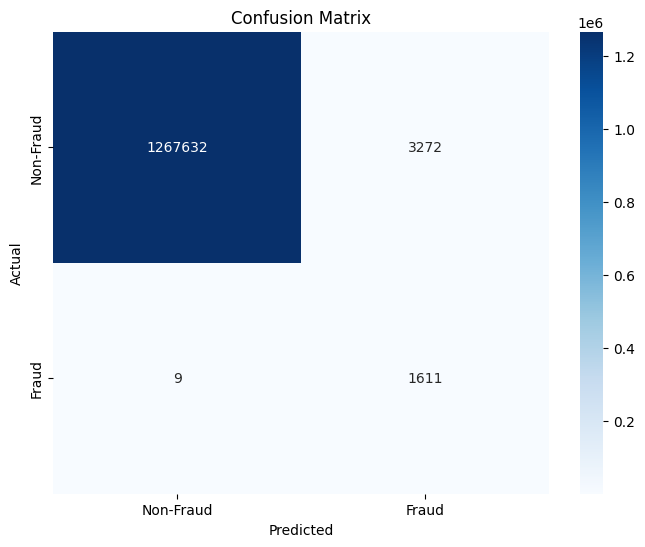


AUC-ROC Score:
AUC-ROC: 0.9987


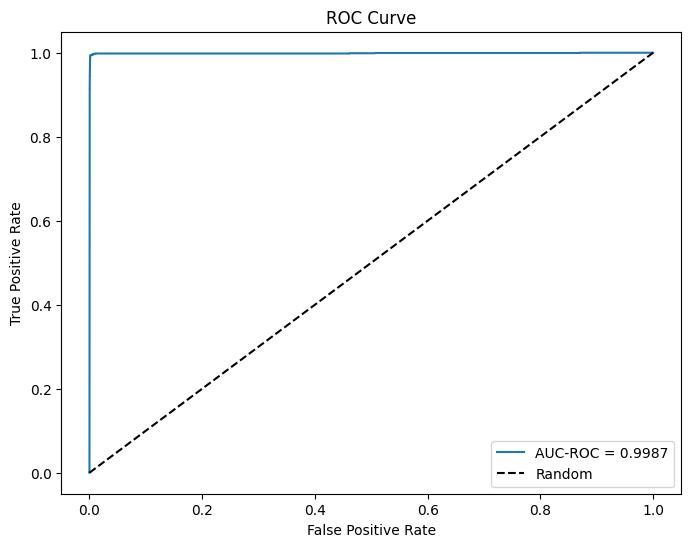

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAUC-ROC Score:")
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [26]:
best_params = model.get_params()
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [27]:
import os
import joblib
import json

os.makedirs("models", exist_ok=True)

# Save XGBoost native model (portable)
model.save_model("models/xgb_model.json")

# Save full sklearn-compatible object (includes Python state)
joblib.dump(model, "models/xgb_model.joblib")

# Save preprocessing & metadata for future inference
artifacts = {
    "scaler": scaler,
    "train_cols": list(train_cols),
    "numerical_cols": list(numerical_cols_train),
    "best_params": best_params
}
joblib.dump(artifacts, "models/preprocessing_artifacts.joblib")

# Also save train_cols as JSON for quick inspection
with open("models/train_cols.json", "w") as f:
    json.dump(list(train_cols), f)

print("Saved model and artifacts to ./models/")

Saved model and artifacts to ./models/


# Task
Visualize the clustering of 'TRANSFER' and 'CASH_OUT' transactions based on numerical features using dimensionality reduction (t-SNE or UMAP) and color the points by the `is_fraud` column.

## Filter data

### Subtask:
Filter the original DataFrame to include only 'TRANSFER' and 'CASH_OUT' transaction types.


**Reasoning**:
Filter the original DataFrame to include only 'TRANSFER' and 'CASH_OUT' transaction types and display the head and shape of the filtered DataFrame.



In [ ]:
df_filtered = df[df['transac_type'].isin(['TRANSFER', 'CASH_OUT'])].copy()

display(df_filtered.head())
print("\nShape of the filtered DataFrame:")
print(df_filtered.shape)

,time_ind,transac_type,amount,src_acc,src_bal,src_new_bal,dst_acc,dst_bal,dst_new_bal,is_fraud,is_flagged_fraud
2,1,TRANSFER,181.00,acc1796908,181.0,0.0,acc4938640,0.0,0.00,1,0
3,1,CASH_OUT,181.00,acc4182296,181.0,0.0,acc1221153,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,acc7697333,15325.0,0.0,acc2123864,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,acc8579790,705.0,0.0,acc1511007,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,acc5249602,10835.0,0.0,acc5114175,6267.0,2719172.89,0,0



Shape of the filtered DataFrame:
(2770409, 11)


## Feature selection and preprocessing

### Subtask:
Select relevant numerical features and potentially apply scaling. Since categorical features are already filtered, focus on numerical ones.


In [ ]:
from sklearn.preprocessing import StandardScaler

X_numerical = df_filtered[['amount', 'src_bal', 'src_new_bal', 'dst_bal', 'dst_new_bal']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

y_filtered = df_filtered['is_fraud']

print("Shape of scaled numerical features:")
print(X_scaled.shape)
print("\nShape of filtered target variable:")
print(y_filtered.shape)

Shape of scaled numerical features:
(2770409, 5)

Shape of filtered target variable:
(2770409,)


## Dimensionality reduction

### Subtask:
Apply a dimensionality reduction technique like t-SNE or UMAP to reduce the selected features to 2 components for visualization.


**Reasoning**:
Apply UMAP dimensionality reduction to the scaled numerical features to reduce them to 2 components for visualization.



**Reasoning**:
The previous command failed because the dataframe 'df' was not defined. Load the dataframe 'df' from the csv file, then filter the data, apply dimensionality reduction, and finally create the scatter plot.



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


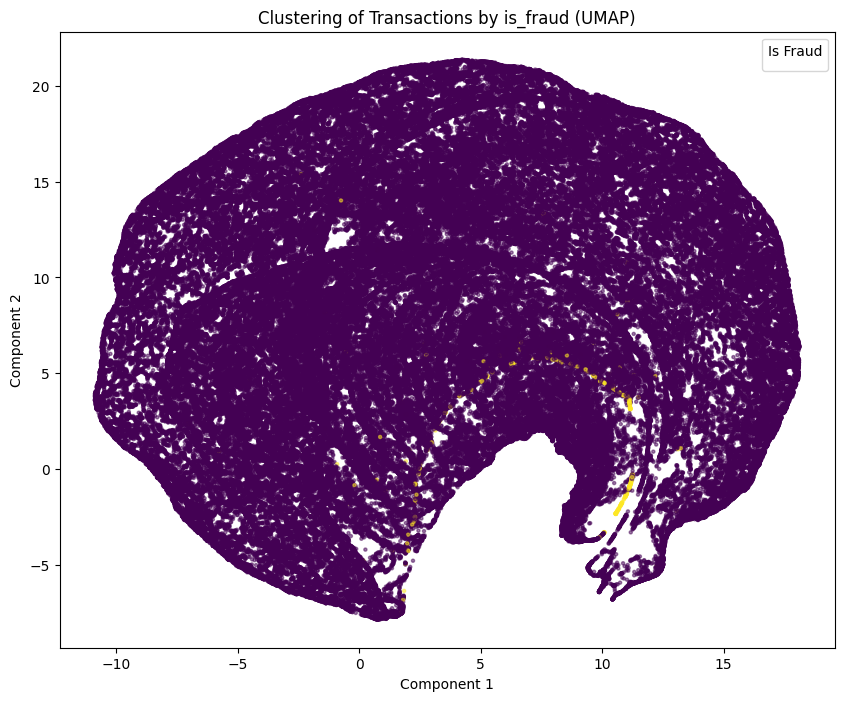